## Choropleth mapping
This lab you will work on creating choropleth map using Python
Reference: https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0


#### The color bar can be selected from: https://matplotlib.org/users/colormaps.html




### Explore pandas and Geopandas dataframes
Import geopandas. Geopandas can read almost any vector-based spatial data format including ESRI shapefile using read_file command which returns a GeoDataframe object. The shapefile consists of many columns, of which only 3 are of any interest to us. The columns are renamed for easy referencing.

In [27]:
import geopandas as gpd
shapefile = 'data/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.head()


ADMIN ADM0_A3  \
0                         Fiji     FJI   
1  United Republic of Tanzania     TZA   
2               Western Sahara     SAH   
3                       Canada     CAN   
4     United States of America     USA   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

Rename columns.

In [28]:

gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()


country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

In [33]:
print(gdf[gdf['country'] == 'Antarctica'])


        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  (POLYGON ((-48.66061601418252 -78.047018731598...  


In [34]:
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [7]:
import pandas as pd
datafile = 'data/obesity.csv'
#Read csv file using pandas
df = pd.read_csv(datafile, names = ['entity', 'code', 'year', 'per_cent_obesity'], skiprows = 1)
df.head()

entity code  year  per_cent_obesity
0  Afghanistan  AFG  1975               0.5
1  Afghanistan  AFG  1976               0.5
2  Afghanistan  AFG  1977               0.6
3  Afghanistan  AFG  1978               0.6
4  Afghanistan  AFG  1979               0.6

In [9]:
df.info()
df[df['code'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 4 columns):
entity              8022 non-null object
code                7980 non-null object
year                8022 non-null int64
per_cent_obesity    8022 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 250.8+ KB


entity code  year  per_cent_obesity
6762  Sudan (former)  NaN  1975               1.0
6763  Sudan (former)  NaN  1976               1.5
6764  Sudan (former)  NaN  1977               1.1
6765  Sudan (former)  NaN  1978               1.2
6766  Sudan (former)  NaN  1979               1.3
6767  Sudan (former)  NaN  1980               1.3
6768  Sudan (former)  NaN  1981               0.8
6769  Sudan (former)  NaN  1982               0.9
6770  Sudan (former)  NaN  1983               1.1
6771  Sudan (former)  NaN  1984               1.9
6772  Sudan (former)  NaN  1985               1.8
6773  Sudan (former)  NaN  1986               1.9
6774  Sudan (former)  NaN  1987               1.9
6775  Sudan (former)  NaN  1988               2.0
6776  Sudan (former)  NaN  1989               1.6
6777  Sudan (former)  NaN  1990               2.7
6778  Sudan (former)  NaN  1991               2.8
6779  Sudan (former)  NaN  1992               3.2
6780  Sudan (former)  NaN  1993               3.1
6781  Sudan (former)  NaN  1994               2.9
6782  Sudan (former)  NaN  1995               2.7
6783  Sudan (former)  NaN  1996               3.6
6784  Sudan (former)  NaN  1997               2.7
6785  Sudan (former)  NaN  1998               3.7
6786  Sudan (former)  NaN  1999               5.5
6787  Sudan (former)  NaN  2000               5.8
6788  Sudan (former)  NaN  2001               5.0
6789  Sudan (former)  NaN  2002               3.7
6790  Sudan (former)  NaN  2003               4.4
6791  Sudan (former)  NaN  2004               5.9
6792  Sudan (former)  NaN  2005               4.8
6793  Sudan (former)  NaN  2006               4.3
6794  Sudan (former)  NaN  2007               5.8
6795  Sudan (former)  NaN  2008               6.1
6796  Sudan (former)  NaN  2009               5.1
6797  Sudan (former)  NaN  2010               6.5
6798  Sudan (former)  NaN  2011               6.1
6799  Sudan (former)  NaN  2012               6.4
6800  Sudan (former)  NaN  2013               5.7
6801  Sudan (former)  NaN  2014               5.8
6802  Sudan (former)  NaN  2015               8.6
6803  Sudan (former)  NaN  2016               8.6

In [35]:
df_2016.head()

entity code  year  per_cent_obesity
41   Afghanistan  AFG  2016               5.5
83       Albania  ALB  2016              21.7
125      Algeria  DZA  2016              27.4
167      Andorra  AND  2016              25.6
209       Angola  AGO  2016               8.2

In [36]:
gdf.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

In [59]:
#Filter data for year 2016.
df_2016 = df[df['year'] == 2016]

#Merge dataframes gdf and df_2016.
merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'code')


#Perform left merge to preserve every row in gdf.
merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'code', how = 'left')


merged.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry         entity code  \
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...           Fiji  FJI   
1  POLYGON ((33.90371119710453 -0.950000000000000...       Tanzania  TZA   
2  POLYGON ((-8.665589565454809 27.65642588959236...            NaN  NaN   
3  (POLYGON ((-122.84 49.00000000000011, -122.974...         Canada  CAN   
4  (POLYGON ((-122.84 49.00000000000011, -120 49....  United States  USA   

     year  per_cent_obesity  
0  2016.0              30.2  
1  2016.0               8.4  
2     NaN               NaN  
3  2016.0              29.4  
4  2016.0              36.2

NaN is not a valid JSON object, therefore, we will replace all NaN values in merged dataframe into a string ‘No data’.

In [65]:
#Replace NaN values to string 'No data'.
merged.fillna('No data', inplace = True)
merged.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry         entity     code  \
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...           Fiji      FJI   
1  POLYGON ((33.90371119710453 -0.950000000000000...       Tanzania      TZA   
2  POLYGON ((-8.665589565454809 27.65642588959236...        No data  No data   
3  (POLYGON ((-122.84 49.00000000000011, -122.974...         Canada      CAN   
4  (POLYGON ((-122.84 49.00000000000011, -120 49....  United States      USA   

      year per_cent_obesity  
0     2016             30.2  
1     2016              8.4  
2  No data          No data  
3     2016             29.4  
4     2016             36.2

The merged file is a GeoDataframe object that can be rendered using geopandas module. However, since we want to incorporate data visualization interactivity, we will use Bokeh library. Bokeh consumes GeoJSON format which represents geographical features with JSON. GeoJSON describes points, lines and polygons (called Patches in Bokeh) as a collection of features. We therefore convert the merged file to GeoJSON format.

In [66]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [67]:
merged.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry         entity     code  \
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...           Fiji      FJI   
1  POLYGON ((33.90371119710453 -0.950000000000000...       Tanzania      TZA   
2  POLYGON ((-8.665589565454809 27.65642588959236...        No data  No data   
3  (POLYGON ((-122.84 49.00000000000011, -122.974...         Canada      CAN   
4  (POLYGON ((-122.84 49.00000000000011, -120 49....  United States      USA   

      year per_cent_obesity  
0     2016             30.2  
1     2016              8.4  
2  No data          No data  
3     2016             29.4  
4     2016             36.2

In [68]:
palette = brewer['YlGnBu'][8]
palette

['#0c2c84',
 '#225ea8',
 '#1d91c0',
 '#41b6c4',
 '#7fcdbb',
 '#c7e9b4',
 '#edf8b1',
 '#ffffd9']

In [70]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)


#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')


#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
            border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)


Loading BokehJS ...

## Choropleth of Blood lead in Phily

In [77]:
# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'

blood_lead_gdf = gpd.read_file(blood_lead_shp)
blood_lead_gdf.head()


census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
0  42101000100           0         0.0       100.0         0.0   
1  42101000200           1         NaN       109.0         NaN   
2  42101000300           1         NaN       110.0         NaN   
3  42101000401           1         NaN        61.0         NaN   
4  42101000402           0         0.0        41.0         0.0   

                                            geometry  
0  POLYGON ((-75.14147213273969 39.9517072267047,...  
1  POLYGON ((-75.162377698504 39.9576545523082, -...  
2  POLYGON ((-75.17820482839041 39.9598134132842,...  
3  POLYGON ((-75.1729917788024 39.9546437050483, ...  
4  POLYGON ((-75.1633313650233 39.9533392100125, ...

Descriptive analysis of the data

In [84]:

print(blood_lead_gdf['perc_5plus'].min())
print('The mas value is:', blood_lead_gdf['perc_5plus'].max())
print('The mean value is:', blood_lead_gdf['perc_5plus'].mean())
blood_lead_gdf['perc_5plus'].describe()


0.0
The mas value is: 17.6
The mean value is: 5.8586614173228355


count    254.000000
mean       5.858661
std        3.939310
min        0.000000
25%        3.225000
50%        5.700000
75%        8.475000
max       17.600000
Name: perc_5plus, dtype: float64

Fill the NaN with 'No data'


In [86]:
#Replace NaN values to string 'No data'.
blood_lead_gdf.fillna('No data', inplace = True)
blood_lead_gdf.head()

census_tra  data_redac num_bll_5p num_screen perc_5plus  \
0  42101000100           0          0        100          0   
1  42101000200           1    No data        109    No data   
2  42101000300           1    No data        110    No data   
3  42101000401           1    No data         61    No data   
4  42101000402           0          0         41          0   

                                            geometry  
0  POLYGON ((-75.14147213273969 39.9517072267047,...  
1  POLYGON ((-75.162377698504 39.9576545523082, -...  
2  POLYGON ((-75.17820482839041 39.9598134132842,...  
3  POLYGON ((-75.1729917788024 39.9546437050483, ...  
4  POLYGON ((-75.1633313650233 39.9533392100125, ...

Create geojson object from the geopandas dataframe

In [87]:
import json
#Read data to json.
blood_lead_json = json.loads(blood_lead_gdf.to_json())
#Convert to String like object.
blood_lead_json_data = json.dumps(blood_lead_json)


In [101]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = blood_lead_json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 20)


#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 20, nan_color = '#d9d9d9')


#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
            border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Blood lead distribution in Philadelphia', 
#            plot_height = 600, 
#            plot_width = 650, 
#            x_axis_type="mercator", y_axis_type="mercator",
           toolbar_location = None)

# p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
#            x_axis_type="mercator", y_axis_type="mercator")


p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'perc_5plus', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)


Loading BokehJS ...

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)


#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')


#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
            border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)


In [17]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
#Define function that returns json_data for year selected by user.
    
def json_data(selectedYear):
    yr = selectedYear
    df_yr = df[df['year'] == yr]
    merged = gdf.merge(df_yr, left_on = 'country_code', right_on = 'code', how = 'left')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2016))
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('% obesity', '@per_cent_obesity')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'below')
# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'Share of adults who are obese, %d' %yr
    
# Make a slider object: slider 
slider = Slider(title = 'Year',start = 1975, end = 2016, step = 1, value = 2016)
slider.on_change('value', update_plot)
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)
#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/server.html



In [26]:
from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

output_file("ridgeplot.html")

def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

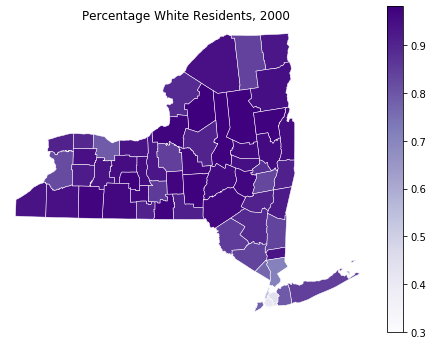

In [2]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.AlbersEqualArea()
)
plt.title("Percentage White Residents, 2000")
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
import pysal
from descartes import PolygonPatch
import fiona
from itertools import chain
import math

import matplotlib


class MapContainer():
    def __init__(self,shp_filename,index_attr,data_series,fig,ax,
                        num_categories = 10,method = 'quantiles', add_region = False,
                region_file = "./geometry/regions_selected_wgs84.shp"):
        self.shp_filename = shp_filename
        self.add_region = add_region
        self.region_file = region_file
        self.index_attr = index_attr
        self.data_series = data_series
        self.fig = fig
        self.ax = ax

        self.m = self._init_map(ax = self.ax)
        self.df_map = self._prepare_data(self.m,data_series,index_attr,
                            fillna_value=0,num_categories = num_categories,
                            method = method)


    def draw(self,axes):

        pass


    def _init_map(self,extra = 0.01,ax = None):
        shp_filename = self.shp_filename
        coords = self._get_bounds(self.shp_filename)

        self.coords = coords
        w, h = coords[2] - coords[0], coords[3] - coords[1]
        lon_0 = math.floor(coords[0])
        lat_0 = math.floor(coords[1])

        m = Basemap(
            projection='tmerc',
            lon_0=lon_0,
            lat_0=lat_0,
            ellps = 'WGS84',
            llcrnrlon=coords[0] - extra * w,
            llcrnrlat=coords[1] - extra * h,
            urcrnrlon=coords[2] + extra * w,
            urcrnrlat=coords[3] + extra * h,
            lat_ts=0,
            resolution='i',
            suppress_ticks=True,
            ax=ax)

        m.readshapefile(
            shp_filename.replace('.shp',''),
            'geom',
            color='#202020',
            zorder=1)
        
        m.readshapefile(
            shp_filename.replace('.shp',''),
            'geom',
            color='#202020',
            zorder=1)
        if self.add_region:
            m.readshapefile(
                    self.region_file.replace('.shp',''),
                    'regions',
                    color='#333333',
                    linewidth = 2,
                    zorder=5)
        
        return m


    def _get_bounds(self,shp_filename):
        #shp_filename = self.shp_filename
        shp = fiona.open(shp_filename)
        bds = shp.bounds
        shp.close()
        extra = 0.05
        ll = (bds[0], bds[1])
        ur = (bds[2], bds[3])
        coords = list(chain(ll, ur))
        
        return coords


    def _prepare_data(self,m,data_series,index_attr,fillna_value=0,num_categories=10,
                            method = 'quantiles'):
        '''
            output: df['poly','attr','value','category']
        '''
        df_map = pd.DataFrame({
            'poly': [Polygon(xy) for xy in m.geom],
            'attr': [item[index_attr] for item in m.geom_info]})

        values = data_series[df_map['attr']]
        values = values.fillna(fillna_value)
        df_map['value'] = list(values)

        if (method=='natural break'):
            classifier = pysal.Natural_Breaks(data_series,k = num_categories)
        elif (method=='quantiles'):
            classifier = pysal.Quantiles(data_series,k = num_categories)
        else:
            #to-do: add other methods here
            classifier = pysal.Quantiles(data_series,k = num_categories)
        self._classifier = classifier
        categories = classifier.find_bin(values)

        df_map['category'] = categories

        return df_map

    def draw_choropleth(self,fig,ax,label_name = '',cmap_name='Blues',
                        num_categories = 10, 
                        edge_color='#606060',line_width = .05,
                        alpha = .9, zorder = 4, cb_shrink = .3, fillna_value=0,
                        fig_code = None, fig_title = None,cb_style=None):

        df_map = self.df_map
        m = self.m
        coords =self.coords

        
        N = num_categories
        cmap = plt.get_cmap(cmap_name)
        color_i = np.linspace(0,1,N)
        color_rgba = cmap(color_i)

        pps = [PolygonPatch(x,
            fc=color_rgba[y] if z != fillna_value else '#cccccc',
            ec=edge_color, 
            lw=line_width, alpha=alpha,
            zorder=zorder) for x,y,z in zip(df_map['poly'],df_map['category'],
                                            df_map['value'])]
        pc = PatchCollection(pps, match_original=True)

        ax.add_collection(pc)
        
        
        cmap = matplotlib.colors.ListedColormap(color_rgba)
        mappable = cm.ScalarMappable(cmap=cmap)
        mappable.set_array([])
        mappable.set_clim(0, N)
        colorbar = fig.colorbar(mappable,shrink=cb_shrink,ax=ax)
        colorbar.set_ticks(np.linspace(1, N, N))
        cb_labels = self._classifier.bins.astype(float)
        if (cb_style=='quantile_k'): 
            cb_labels = [("  Q{}: ".format(x) if x <10 else "Q{}: ".format(x))+ \
                                    str(round(y/1000,1)) + 'k' 
                     for x,y in zip(range(1,len(cb_labels)+1),cb_labels)]
        elif (cb_style=='quantile'): 
            cb_labels = [("  Q{}: ".format(x) if x <10 else "Q{}: ".format(x))+ \
                                    '{0:.2f}'.format(y)
                     for x,y in zip(range(1,len(cb_labels)+1),cb_labels)]
        colorbar.set_ticklabels(cb_labels)
        colorbar.set_label(label_name)
        
        m.drawmapscale(
            coords[0] + 0.2, coords[1] + 0.01,
            coords[0], coords[1],
            10.,
            barstyle='fancy', labelstyle='simple',
            fillcolor1='w', fillcolor2='#555555',
            fontcolor='#555555',
            zorder=5)

        if fig_code is not None:
            ymin,ymax = ax.get_ylim()
            xmin,xmax = ax.get_xlim()
            ax.text(self.pick_loc(xmin,xmax,0.05), self.pick_loc(ymin,ymax,0.95), 
                    fig_code, ha='center', va='center',fontsize=12)

        if fig_title is not None:
            ax.set_title(fig_title)
        
        

    def pick_loc(self,x1,x2,p):
        return (x2-x1)*p+x1
    


class MapContainer_center(MapContainer):
    def __init__(self,shp_filename,index_attr,data_series,fig,ax,
                        num_categories = 10, category_bins = [],add_region = False,
                region_file = "./geometry/regions_selected_wgs84.shp"):

        self.shp_filename = shp_filename
        self.add_region = add_region
        self.region_file = region_file
        self.index_attr = index_attr
        self.data_series = data_series
        self.fig = fig
        self.ax = ax

        self.m = self._init_map(ax = self.ax)
        self.category_bins = category_bins
        self.df_map = self._prepare_data(self.m,data_series,index_attr,
                            fillna_value=0,num_categories = num_categories)

    def _prepare_data(self,m,data_series,index_attr,fillna_value=0,
                            num_categories=10,
                            method = 'quantiles'):
        '''
            output: df['poly','attr','value','category']
        '''
        df_map = pd.DataFrame({
            'poly': [Polygon(xy) for xy in m.geom],
            'attr': [item[index_attr] for item in m.geom_info]})

        values = data_series[df_map['attr']]
        values = values.fillna(fillna_value)
        df_map['value'] = list(values)

        if abs(values.max())>abs(values.min()):
            max_value = abs(values.max())
        else:
            max_value = abs(values.min())
        max_value = math.ceil(max_value)
        classifier = pysal.Quantiles(values,k = num_categories)
        if self.category_bins != []:
            classifier.bins = self.category_bins
        else:
            classifier.bins = np.linspace(-max_value,max_value,num_categories)
        

        self._classifier = classifier
        categories = classifier.find_bin(values)

        df_map['category'] = categories

        return df_map

    def draw_choropleth(self,fig,ax,label_name = '',cmap_name='Blues',
                        num_categories = 10, 
                        edge_color='#606060',line_width = .25,
                        alpha = .9, zorder = 4, cb_shrink = .3, fillna_value=0,
                        fig_code = None, fig_title = None, plot_colorbar = True):

        df_map = self.df_map
        m = self.m
        coords =self.coords

        
        N = num_categories
        cmap = plt.get_cmap(cmap_name)
        color_i = np.linspace(0,1,N)
        #color_i = color_i - 1/(N-1)
        #color_i[0] = 0
        color_rgba = cmap(color_i)

        pps = [PolygonPatch(x,
            fc=color_rgba[y] if z != fillna_value else '#cccccc',
            ec=edge_color, 
            lw=line_width, alpha=alpha,
            zorder=zorder) for x,y,z in zip(df_map['poly'],df_map['category'],
                                            df_map['value'])]
        pc = PatchCollection(pps, match_original=True)

        ax.add_collection(pc)

        
        
        cmap = matplotlib.colors.ListedColormap(color_rgba)
        mappable = cm.ScalarMappable(cmap=cmap)
        mappable.set_array([])
        mappable.set_clim(0, N)
        if plot_colorbar:
            colorbar = fig.colorbar(mappable,shrink=cb_shrink,ax=ax)
            colorbar.set_ticks(np.linspace(1, N, N))
            colorbar.set_ticklabels(self._classifier.bins.astype(float))
            colorbar.set_label(label_name)
        
        m.drawmapscale(
            coords[0] + 0.2, coords[1] + 0.01,
            coords[0], coords[1],
            10.,
            barstyle='fancy', labelstyle='simple',
            fillcolor1='w', fillcolor2='#555555',
            fontcolor='#555555',
            zorder=5)

        if fig_code is not None:
            ymin,ymax = ax.get_ylim()
            xmin,xmax = ax.get_xlim()
            ax.text(self.pick_loc(xmin,xmax,0.05), self.pick_loc(ymin,ymax,0.95), 
                    fig_code, ha='center', va='center',fontsize=12)

        if fig_title is not None:
            ax.set_title(fig_title)

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [4]:

import geopandas as gpd

blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# blood_lead_gdf_phily.plot(column='perc_5plus', 
index_attr = 'perc_5plus'
                          

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


AttributeError: module 'pysal' has no attribute 'Quantiles'

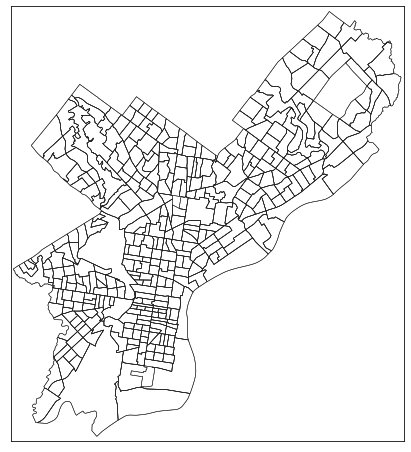

In [10]:

fig, ax = plt.subplots(1, figsize=(12, 8))
cmap = plt.cm.get_cmap('Blues', 6)

# # plot the choropleth map of blood lead in Philadelphia
# blood_lead_gdf_phily.plot(column='perc_5plus', 
#                          cmap='Blues', 
#                          edgecolor='0.5',
#                          ax = ax,
#                          linewidth=0.5,
#                          scheme='equal_interval')


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf['perc_5plus'].min(), vmax=blood_lead_gdf['perc_5plus'].max())
# n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
# n_cmap.set_array([])
# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
# cbar.ax.set_xlabel('Blood level')

# ax.axis('off')
# df_data = taxi_weekend.d_counts
data_series = blood_lead_gdf.sum(axis=1).dropna()

map_container = MapContainer(blood_lead_shp,index_attr,data_series,fig,ax, method='Quantiles')

map_container.draw_choropleth(fig,ax,fig_code='(H)',fig_title='Taxi Weekend- Destination',
                              num_categories=num_categories,cb_style='natural break')

ax.scatter([],[],c='#cccccc',edgecolor='#000000',marker='s', label='NoData')
ax.legend(loc = no_data_loc,edgecolor='#ffffff')



In [9]:
import pysal as ps

import numpy
import pysal
numpy.random.seed(123456)
cal = pysal.esda.mapclassify.load_example()
nb = pysal.Natural_Breaks(cal, k=5)
nb.k

AttributeError: module 'pysal' has no attribute 'esda'

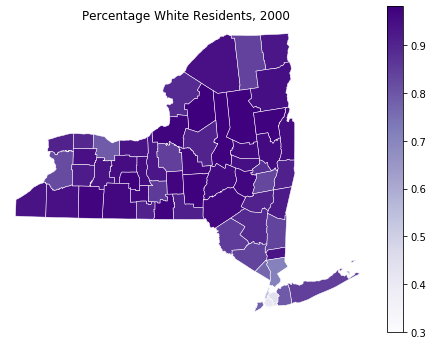

In [28]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer


ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)


ax = gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.AlbersEqualArea()
)


plt.title("Percentage White Residents, 2000")
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)
plt.show()


In [53]:
levels

array([-2.0000000e+00, -1.6000000e+00, -1.2000000e+00, -8.0000000e-01,
       -4.0000000e-01, -4.4408921e-16,  4.0000000e-01,  8.0000000e-01,
        1.2000000e+00,  1.6000000e+00])

In [78]:
blood_lead_gdf.head()

census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
0  42101000100           0         0.0       100.0         0.0   
1  42101000200           1         NaN       109.0         NaN   
2  42101000300           1         NaN       110.0         NaN   
3  42101000401           1         NaN        61.0         NaN   
4  42101000402           0         0.0        41.0         0.0   

                                            geometry  
0  POLYGON ((-75.14147213273969 39.9517072267047,...  
1  POLYGON ((-75.162377698504 39.9576545523082, -...  
2  POLYGON ((-75.17820482839041 39.9598134132842,...  
3  POLYGON ((-75.1729917788024 39.9546437050483, ...  
4  POLYGON ((-75.1633313650233 39.9533392100125, ...

#### Create choropleth map

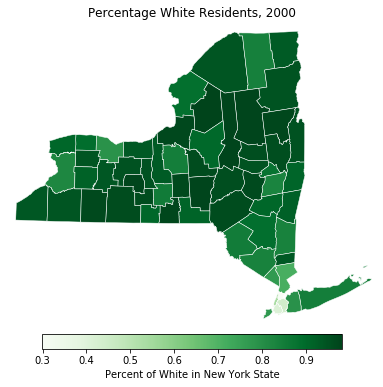

In [21]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

cmap = cm.Greens

ax = gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap=cmap, linewidth=0.5,
    edgecolor='white', k=None,
#     legend=True,
    projection=gcrs.AlbersEqualArea()
)

percentWhite = ny_census_tracts['percent_white']
plt.title("Percentage White Residents, 2000")

norm = cm.colors.Normalize(vmax=percentWhite.max(), vmin=percentWhite.min())

n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])

cbar = fig.colorbar(n_cmap, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)

# cbar.ax.set_ylabel('verbosity coefficient')
cbar.ax.set_xlabel('Percent of White in New York State')

plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)
plt.show()


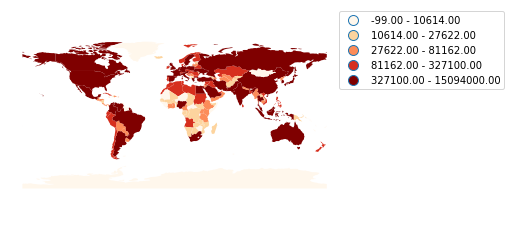

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(column='gdp_md_est', cmap='OrRd', scheme='quantiles', legend=True)
ax.get_legend().set_bbox_to_anchor((1.5, 1))

ax.set_axis_off()
plt.axis('equal')
plt.show()

In [36]:
blood_lead_gdf['perc_5plus'].max()
blood_lead_gdf['perc_5plus'].min()

0.0

<Figure size 1440x576 with 0 Axes>

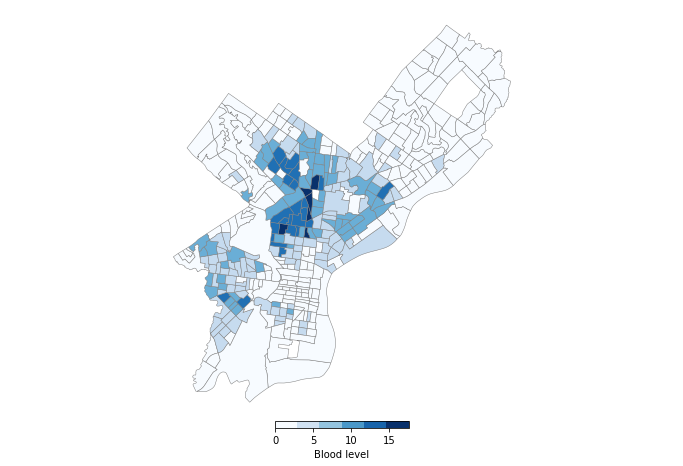

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

plt.figure(figsize=(20,8))
# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})

f, ax = plt.subplots(1, figsize=(12, 8))
cmap = plt.cm.get_cmap('Blues', 6)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column='perc_5plus', 
                         cmap='Blues', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf['perc_5plus'].min(), vmax=blood_lead_gdf['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])
cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

In [79]:
blood_lead_gdf.head()

census_tra  data_redac num_bll_5p num_screen perc_5plus  \
0  42101000100           0          0        100          0   
1  42101000200           1        -99        109        -99   
2  42101000300           1        -99        110        -99   
3  42101000401           1        -99         61        -99   
4  42101000402           0          0         41          0   

                                            geometry  
0  POLYGON ((-75.14147213273969 39.9517072267047,...  
1  POLYGON ((-75.162377698504 39.9576545523082, -...  
2  POLYGON ((-75.17820482839041 39.9598134132842,...  
3  POLYGON ((-75.1729917788024 39.9546437050483, ...  
4  POLYGON ((-75.1633313650233 39.9533392100125, ...

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/mapclassify/classifiers.py:276: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/mapclassify/classifiers.py:276: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


<Figure size 1440x576 with 0 Axes>

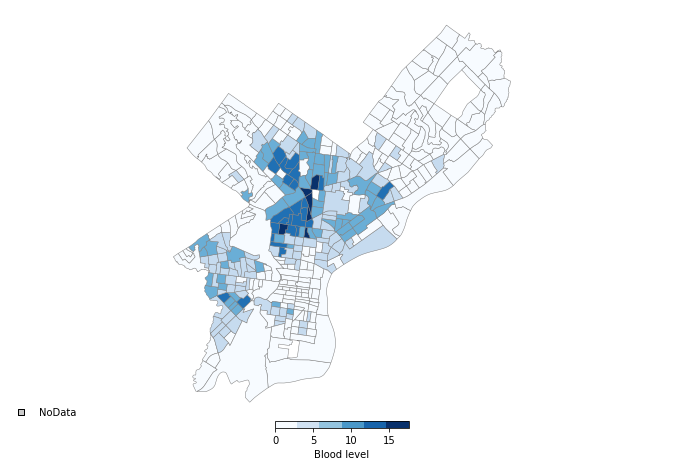

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

fig=plt.figure(figsize=(20,8))
fig.tight_layout()

# deal with the invalid data
no_data_loc = (0.00,0)

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)


# blood_lead_gdf.fillna(value=-1, inplace=True)

blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})
# blood_lead_gdf_phily = blood_lead_gdf_phily.dropna(how='any',axis=0)

f, ax = plt.subplots(1, figsize=(12, 8))
cmap = plt.cm.get_cmap('Blues', 6)
cmap.set_bad('red',2.)


# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column='perc_5plus', 
                         cmap='Blues', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf['perc_5plus'].min(), vmax=blood_lead_gdf['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])

# cbaxes = fig.add_axes([2, 4, 0.2, 0.03]) 

cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_xlabel('Blood level')

ax.scatter([],[],c='#cccccc',edgecolor='#000000',marker='s', label='NoData')
ax.legend(loc = no_data_loc,edgecolor='#ffffff')

ax.set_axis_off()
plt.axis('equal')
plt.show()


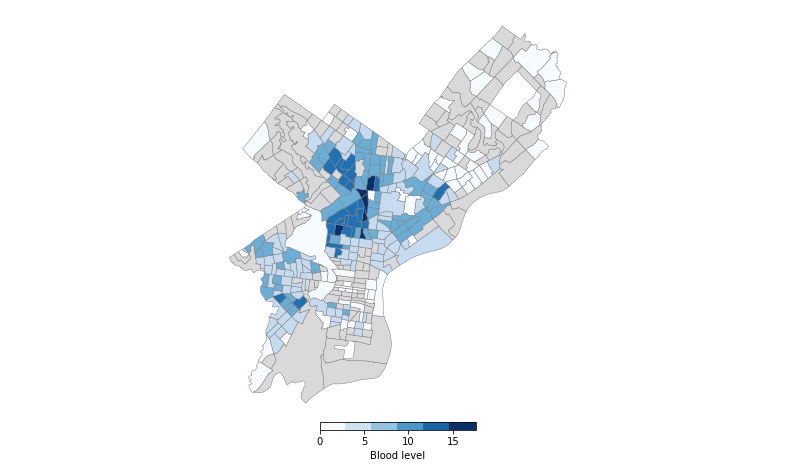

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as mpatches



# deal with the invalid data
no_data_loc = (0.00,0)

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)


# blood_lead_gdf.fillna(value=-1, inplace=True)

blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})
blood_lead_gdf_valid = blood_lead_gdf_phily.dropna(how='any',axis=0)
blood_lead_gdf_null = blood_lead_gdf_phily[blood_lead_gdf_phily.isnull().any(axis=1)]

f, ax = plt.subplots(1, figsize=(14, 8))
cmap = plt.cm.get_cmap('Blues', 6)


# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_null.plot(column='perc_5plus', 
#                          cmap='Reds', 
                         edgecolor='0.5',
                         color='#d9d9d9',
                         ax = ax,
                         linewidth=0.5)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_valid.plot(column='perc_5plus', 
                         cmap='Blues', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf_valid['perc_5plus'].min(), vmax=blood_lead_gdf_valid['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])

cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()


In [43]:
blood_lead_gdf_null = blood_lead_gdf_phily[blood_lead_gdf_phily.isnull().any(axis=1)]
blood_lead_gdf_null.head()

census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
1  42101000200           1         NaN       109.0         NaN   
2  42101000300           1         NaN       110.0         NaN   
3  42101000401           1         NaN        61.0         NaN   
5  42101000500           1         NaN        49.0         NaN   
8  42101000801           1         NaN        57.0         NaN   

                                            geometry  
1  POLYGON ((821071.0231887944 72560.3994905389, ...  
2  POLYGON ((819712.2513144484 72760.50439406626,...  
3  POLYGON ((820174.2313208824 72199.72129492418,...  
5  POLYGON ((820997.3931870675 72079.76159304382,...  
8  POLYGON ((819809.0635611538 71729.23689167897,...

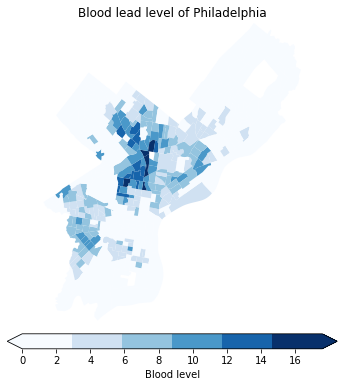

In [46]:

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import numpy as np

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

cmap = plt.cm.get_cmap('Blues', 6)

# create choropleth map of Blood lead in Philadelphia
ax = gplt.choropleth(
    blood_lead_gdf,
    hue='perc_5plus',
    cmap=cmap,
    linewidth=0.5,
    edgecolor='black',
    k=None,
    scheme='fisher_jenks',
#     legend=True,
    projection=gcrs.AlbersEqualArea()
)

blood_lead = blood_lead_gdf['perc_5plus']
plt.title("Blood lead level of Philadelphia")

norm = cm.colors.Normalize(vmax=blood_lead.max(), vmin=blood_lead.min())

n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])
cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.04, extend='both')


# plt.colorbar(percentWhite.values,fraction=0.046, pad=0.04)

# cbar.ax.set_ylabel('verbosity coefficient')
cbar.ax.set_xlabel('Blood level')

# plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)
plt.show()



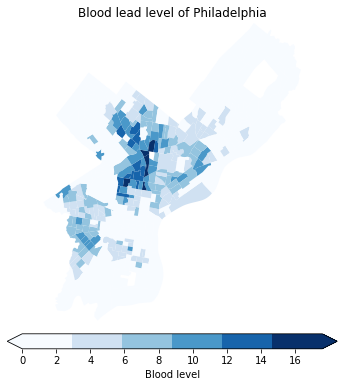

In [4]:

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

cmap = plt.cm.get_cmap('Blues', 6)

# create choropleth map of Blood lead in Philadelphia
ax = gplt.choropleth(
    blood_lead_gdf,
    hue='perc_5plus',
    cmap=cmap,
    linewidth=0.5,
#     edgecolor='black',
    k=None,
    scheme='equal_interval',
#     legend=True,
    projection=gcrs.AlbersEqualArea()
)

blood_lead = blood_lead_gdf['perc_5plus']
plt.title("Blood lead level of Philadelphia")

norm = cm.colors.Normalize(vmax=blood_lead.max(), vmin=blood_lead.min())

n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])
cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.04, extend='both')


# plt.colorbar(percentWhite.values,fraction=0.046, pad=0.04)

# cbar.ax.set_ylabel('verbosity coefficient')
cbar.ax.set_xlabel('Blood level')

# plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)
plt.show()



In [57]:
test = gpd.read_file('data/tl_2017_42101_roads.shp')
test.crs
# blood_lead_gdf.crs

{'init': 'epsg:4269'}

In [55]:
x0

-75.28026599999998

In [1]:
### https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/50674451#50674451
# Notes:

# if you don't use UTM for you axes, the bar will be drawn crooked
# the North arrow assumes north is up

import os
import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib

if os.name == 'nt':
    matplotlib.rc('font', family='Arial')
else:  # might need tweaking, must support black triangle for N arrow
    matplotlib.rc('font', family='DejaVu Sans')


def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1


def scale_bar(ax, proj, length, location=(0.5, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """
    
    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


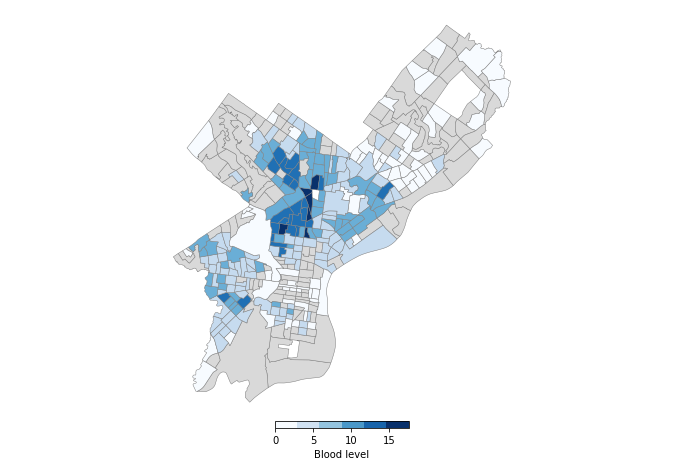

In [3]:
import os

import matplotlib.pyplot as plt
import shapefile

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
# from helpers import slug
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize


title = 'Road map of Philadelphia'
description = 'Roads and railways of the New York metropolitan area as of October 10, 2016.\nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Ramiro Gómez - ramiro.org'
# imgfile = '../img/{}.png'.format(slug(title))
shpfile = os.path.expanduser('data/tl_2017_42101_roads')
census_tract = os.path.expanduser('data/Census_Tracts_2010')

fontcolor='#666666'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, frame_on=False)
# # fig.suptitle(title, fontsize=20, y=.94, color=fontcolor)

# sf = shapefile.Reader(shpfile)

# x0, y0 ,x1, y1 = sf.bbox
# cx, cy = (x0 + x1) / 2, (y0 + y1) / 2

# m = Basemap(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1, lat_0=cx, lon_0=cy, resolution='c', projection='mill')

# # Avoid border around map.
# m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# # m.readshapefile(shpfile, 'shp', linewidth=.15)
# # m.readshapefile(census_tract, 'shp', linewidth=0.1, color='red')

# # Draw a map scale
# m.drawmapscale(
#     x0 + 0.28, y0 + 0.015, # the location of the scale bar, cannot be outside of the map
#     x1, y1,
#     10., # the size of the scale bar
#     barstyle='fancy', labelstyle='simple',
#     fillcolor1='w', fillcolor2='#555555',
#     fontcolor='#555555',
#     zorder=5)



import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as mpatches


# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)


# blood_lead_gdf.fillna(value=-1, inplace=True)

blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})
blood_lead_gdf_valid = blood_lead_gdf_phily.dropna(how='any',axis=0)
blood_lead_gdf_null = blood_lead_gdf_phily[blood_lead_gdf_phily.isnull().any(axis=1)]

# f, ax = plt.subplots(1, figsize=(14, 8))
cmap = plt.cm.get_cmap('Blues', 6)


# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_null.plot(column='perc_5plus', 
#                          cmap='Reds', 
                         edgecolor='0.5',
                         color='#d9d9d9',
                         ax = ax,
                         linewidth=0.5)

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_valid.plot(column='perc_5plus', 
                         cmap='Blues', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf_valid['perc_5plus'].min(), vmax=blood_lead_gdf_valid['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
n_cmap.set_array([])

cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()



# plt.annotate(description, xy=(.58, 0.005), size=16, xycoords='axes fraction', color=fontcolor)
# plt.tight_layout()
# plt.savefig('imgfile.png', bbox_inches='tight', pad_inches=.2)




/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x1a1c0d19e8> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


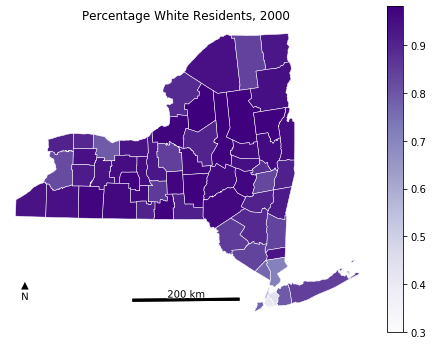

In [12]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

ax = gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.AlbersEqualArea()
)

scale_bar(ax, ccrs.Mercator(), 200)  # 100 km scale bar

plt.title("Percentage White Residents, 2000")
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)

In [7]:
ax

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x1a1b962ba0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


In [53]:
blood_lead_gdf_phily.crs
blood_lead_gdf_phily.head()

census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
0  42101000100           0         0.0       100.0         0.0   
1  42101000200           1         NaN       109.0         NaN   
2  42101000300           1         NaN       110.0         NaN   
3  42101000401           1         NaN        61.0         NaN   
4  42101000402           0         0.0        41.0         0.0   

                                            geometry  
0  POLYGON ((-75.14147213273971 39.9517072267047,...  
1  POLYGON ((-75.162377698504 39.9576545523082, -...  
2  POLYGON ((-75.17820482839041 39.9598134132842,...  
3  POLYGON ((-75.1729917788024 39.9546437050483, ...  
4  POLYGON ((-75.1633313650233 39.9533392100125, ...

In [37]:
blood_lead_gdf_valid.head()

census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
0  42101000100           0         0.0       100.0         0.0   
4  42101000402           0         0.0        41.0         0.0   
6  42101000600           0         0.0        24.0         0.0   
7  42101000700           0         0.0        57.0         0.0   
9  42101000803           0         0.0        63.0         0.0   

                                            geometry  
0  POLYGON ((-75.14147213273969 39.9517072267047,...  
4  POLYGON ((-75.1633313650233 39.9533392100125, ...  
6  POLYGON ((-75.1639387712695 39.9508740649554, ...  
7  POLYGON ((-75.17349243240059 39.9520618460711,...  
9  POLYGON ((-75.1774238003255 39.9505040569508, ...

In [27]:
blood_lead_gdf_null.head()

census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
1  42101000200           1         NaN       109.0         NaN   
2  42101000300           1         NaN       110.0         NaN   
3  42101000401           1         NaN        61.0         NaN   
5  42101000500           1         NaN        49.0         NaN   
8  42101000801           1         NaN        57.0         NaN   

                                            geometry  
1  POLYGON ((-75.162377698504 39.9576545523082, -...  
2  POLYGON ((-75.17820482839041 39.9598134132842,...  
3  POLYGON ((-75.1729917788024 39.9546437050483, ...  
5  POLYGON ((-75.1634037710016 39.9533470650473, ...  
8  POLYGON ((-75.1774238003255 39.9505040569508, ...

In [28]:
test = gpd.read_file('data/tl_2017_42101_roads.shp')
test.head()

LINEARID            FULLNAME RTTYP  MTFCC  \
0   110687637848    Krewstown Rd Rmp     M  S1400   
1   110687638052  Roosevelt Blvd Exd     M  S1400   
2   110687633844        Ashmead Pl N     M  S1400   
3   110687638342     Centennial Sq N     M  S1400   
4  1103256864554         Kirwyn Pl N     M  S1400   

                                            geometry  
0  LINESTRING (-75.03929599999999 40.093939, -75....  
1  LINESTRING (-75.14343699999999 40.019345, -75....  
2  LINESTRING (-75.16687899999999 40.03037, -75.1...  
3  LINESTRING (-75.013955 40.118662, -75.0138 40....  
4  LINESTRING (-75.18674299999999 39.909332999999...

In [111]:
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer


#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')


#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
            border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)



In [112]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)


#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')


#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
            border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)


Loading BokehJS ...

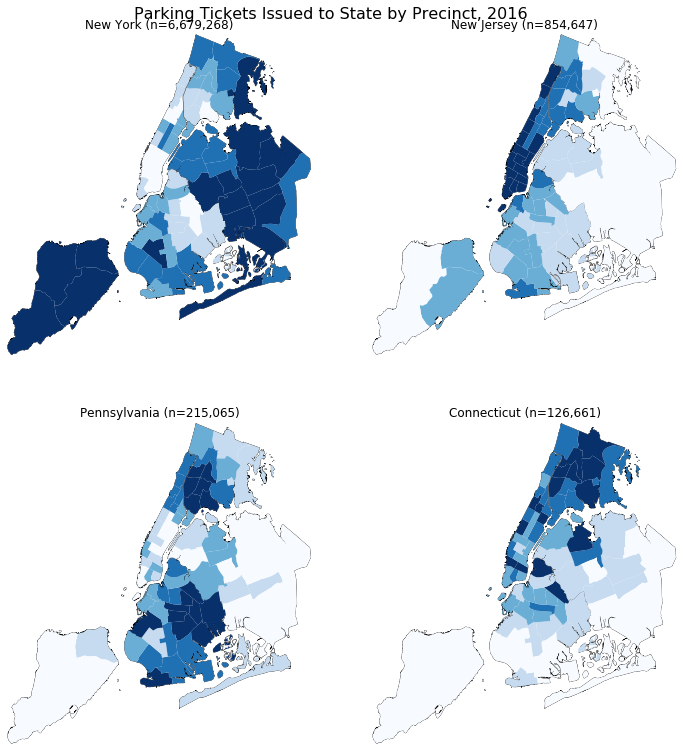

In [113]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

# load the data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
tickets = gpd.read_file(gplt.datasets.get_path('nyc_parking_tickets'))

proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
def plot_state_to_ax(state, ax):
    gplt.choropleth(
        tickets.set_index('id').loc[:, [state, 'geometry']],
        hue=state, cmap='Blues',
        linewidth=0.0, ax=ax
    )
    gplt.polyplot(
        nyc_boroughs, edgecolor='black', linewidth=0.5, ax=ax
    )

f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': proj})

plt.suptitle('Parking Tickets Issued to State by Precinct, 2016', fontsize=16)
plt.subplots_adjust(top=0.95)

plot_state_to_ax('ny', axarr[0][0])
axarr[0][0].set_title('New York (n=6,679,268)')

plot_state_to_ax('nj', axarr[0][1])
axarr[0][1].set_title('New Jersey (n=854,647)')

plot_state_to_ax('pa', axarr[1][0])
axarr[1][0].set_title('Pennsylvania (n=215,065)')

plot_state_to_ax('ct', axarr[1][1])
axarr[1][1].set_title('Connecticut (n=126,661)')

plt.savefig("nyc-parking-tickets.png", bbox_inches='tight')
